# Lecture 13 – Data Science


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Multiple Linear Regression

Let's load in a new dataset. This is aggregate per-player data from the 2018-19 NBA season, downloaded from [Kaggle](https://www.kaggle.com/schmadam97/nba-regular-season-stats-20182019).

In [ ]:
nba = pd.read_csv('nba18-19.csv')

In [ ]:
nba.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<br/>
We are interested in predicting the number of points (`PTS`) an athlete will score in a basketball game this season.

Suppose we want to fit a linear model by using some characteristics, or **feature**s of a player. Specifically, we'll focus on field goals, assists, and 3-point attempts.

- `FG`, the number of (2-point) field goals per game
- `AST`, the average number of assists per game, and
- `3PA`, the number of 3-point field goals attempted per game

This is how we express that model:

$$
\hat{y}
=
\theta_0 +
\theta_1 \cdot \textbf{FG} +
\theta_2 \cdot \textbf{AST} +
\theta_3 \cdot \textbf{3PA}
$$

In [ ]:
# extract required Columns
FG = nba['FG']
AST = nba['AST']
_3PA = nba['3PA']
df = pd.DataFrame({'FG': FG, 'AST': AST, '3PA': _3PA})
df.head()

,FG,AST,3PA
0,1.8,0.6,4.1
1,0.4,0.8,1.5
2,1.1,1.9,2.2
3,6.0,1.6,0.0
4,3.4,2.2,0.2


<br/><br/>
In lecture, we saw that the predictions for the entire data set $\hat{\mathbb{Y}}$ can be computed as:

$$ \Large
\hat{\mathbb{Y}} = \mathbb{X} \theta  
$$

The **design matrix** $\mathbb{X} \in \mathbb{R}^{n,d+1}$ has $n$ rows corresponding to each record in the dataset and $d+1$ columns corresponding to the original $d$ columns in the data plus an additional 1s column vector (**bias/intercept feature**).

Let's build this design matrix using Pandas:

In [ ]:

df.insert(0, 'Bias', 1)
df.head()

,Bias,FG,AST,3PA
0,1,1.8,0.6,4.1
1,1,0.4,0.8,1.5
2,1,1.1,1.9,2.2
3,1,6.0,1.6,0.0
4,1,3.4,2.2,0.2


In [ ]:
# the data shape
df.shape

(708, 4)

In [ ]:
# # For nba data

# # how many observations

# # how many features

# # visualize few

Y = nba['PTS'].values
Y=Y.reshape(-1,1)
print(Y[:5])


[[ 5.3]
 [ 1.7]
 [ 3.2]
 [13.9]
 [ 8.9]]


---
## Example prediction

Suppose we decide to pick an arbitrary parameter $\theta$:

$$\theta = \begin{bmatrix}0.50 \\ -0.14 \\ 0.65 \\ 1.52 \end{bmatrix}$$

(For those interested: I drew these from random values simulated from a standard normal distribution using `np.random.randn`.)

In [ ]:
theta_arbitrary = np.array([[0.5], [-1.14], [0.65], [1.52]])
theta_arbitrary

array([[ 0.5 ],
       [-1.14],
       [ 0.65],
       [ 1.52]])

In [ ]:
X = df.values

For this value of $\theta$ we can make a prediction using our model with matrix multiplication.

The `@` symbol is the matrix multiply operation and is equivalent to writing `xt.dot(theta)`.

In [ ]:
# apply the above random values on 'X' and predict 'y'
print(np.array((X @ theta_arbitrary)[:5]))
Y[:5]

[[ 5.07 ]
 [ 2.844]
 [ 3.825]
 [-5.3  ]
 [-1.642]]


array([[ 5.3],
       [ 1.7],
       [ 3.2],
       [13.9],
       [ 8.9]])

## Computing MSE

For Ordinary Least Squares, the average loss is MSE:

$$ \Large R(\theta) = \frac{1}{n} || \mathbb{Y} - \mathbb{X}\theta||^2_2 $$

NumPy has a handy function `np.linalg.norm` that computes the norm of a matrix (default is L2 norm).

In [ ]:
theta_arbitrary = np.array([0.5, -1.14, 0.65, 1.52])

def mse_nba(theta):
    """
    Y is PTS
    X is intercept, FG, AST, 3PA
    """
    # Predict Y using X and the given theta
    Y_hat = X @ theta

    # Compute the residual (error)
    residual = Y - Y_hat

    # Compute MSE
    mse = (1 / len(Y)) * np.linalg.norm(residual) ** 2

    return mse

# Example usage
mse_value = mse_nba(theta_arbitrary)
print(f"MSE: {mse_value}")


MSE: 57637.901845474626


Is this good? Is this bad? Let's compute the optimal theta and compare!

---
## Implementing Least Squares

From lecture, the Least Squares Estimate $\hat{\theta}$ is:
$$
\Large \hat{\theta} = \left( \mathbb{X}^{\top} \mathbb{X} \right)^{-1} \mathbb{X}^{\top} \mathbb{Y}
$$

While it is not as numerically stable or efficient. We can compute $\hat{\theta}$ by direction using matrix inversion. To do this, we import the `inv` function for the `numpy` linear algebra library:

In [ ]:
from numpy.linalg import inv

In [ ]:
def least_squares_estimate(X, Y):
    # Compute X transpose
    X_transpose = X.T

    # Compute X^T * X
    XtX = X_transpose @ X

    # Compute the inverse of XtX
    XtX_inv = inv(XtX)

    # Compute X^T * Y
    XtY = X_transpose @ Y

    # Compute theta_hat using the formula (X^T * X)^(-1) * X^T * Y
    theta_hat = XtX_inv @ XtY

    return theta_hat

# Example usage
theta_hat = least_squares_estimate(X, Y)
theta_hat


array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

In [ ]:
print("Arbitrary theta MSE: ", mse_nba(theta_arbitrary))
print("Optimal theta MSE:"  , mse_nba(theta_hat))

Arbitrary theta MSE:  57637.901845474626
Optimal theta MSE: 0.3963133329080335


Nice!!!

---
## Making Least Squares Predictions

Now that we have estimated the model parameters $\hat{\theta}$ we can now also predict the points scored $\hat{\mathbb{Y}}$ for each of our players.

In [ ]:
Y_hat = X @ theta_hat

In [ ]:
# Calculate the residuals
residuals = Y - Y_hat
print(residuals[:5])

[[-0.25223188]
 [ 0.4754958 ]
 [-0.06142897]
 [-0.99101334]
 [ 0.46026621]]


<br/>

---

## Model Performance/Diagnosing the Model

In previous lectures, we have plotted the residual vs. our single input feature $x$.

For higher dimensional regression models, we often graph the residual with respect to the fitted values $\hat{y}$.

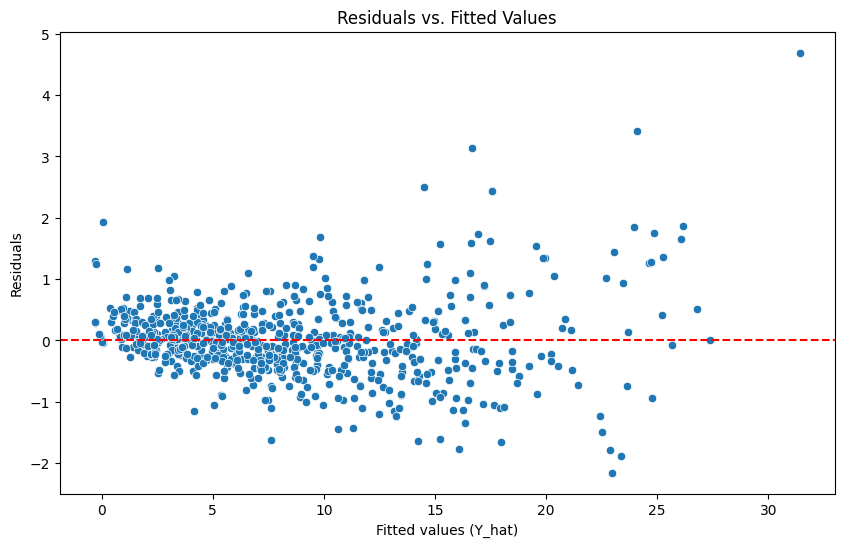

In [ ]:
# code here

import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_hat.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (Y_hat)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


Overall while the residuals are roughly centered around 0 ($\hat{y} = y$), we see **heteroskedasticity**: Our regression spread is uneven, particularly as predictions get big.

## Multiple $R^2$

Let's compute the coefficient of determination, or **multiple $R^2$**, for our model.

In [ ]:
# code here

import numpy as np

def compute_r_squared(Y, Y_hat):

    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)


    RSS = np.sum((Y - Y_hat) ** 2)

    # Calculate
    R_squared = 1 - (RSS / TSS)

    return R_squared

# Compute the value for the model
R_squared = compute_r_squared(Y, Y_hat)
print(f"{R_squared}")


0.9883162128703227


That's super high!!! Wait, what's up with that?

(Hint: Basketball facts)

Let's try reducing the number of features to see how this Multiple $R^2$ metric changes.

In [ ]:
# Use intercept, AST, 3PA




df_reduced = pd.DataFrame({'AST': AST, '3PA': _3PA})
df_reduced.insert(0, 'Bias', 1)  # Insert bias term

# Convert to numpy array
X_reduced = df_reduced.values

# Recompute theta_hat using the reduced feature set
theta_hat_reduced = least_squares_estimate(X_reduced, Y)

# Make new predictions with the reduced model
Y_hat_reduced = X_reduced @ theta_hat_reduced

# Compute R^2 for the reduced model
R_squared_reduced = compute_r_squared(Y, Y_hat_reduced)
print(f"{R_squared_reduced}")


0.6087862763665718


In [ ]:
# Use intercept, AST only (SLR)
# Use only intercept and AST
df_slr = pd.DataFrame({'AST': AST})
df_slr.insert(0, 'Bias', 1)  # Insert bias term

# Convert to numpy array
X_slr = df_slr.values

# Recompute theta_hat using the single feature (AST)
theta_hat_slr = least_squares_estimate(X_slr, Y)

# Make new predictions with the SLR model
Y_hat_slr = X_slr @ theta_hat_slr

# Compute R^2 for the SLR model
R_squared_slr = compute_r_squared(Y, Y_hat_slr)
print(f"R^2 (SLR Model with AST): {R_squared_slr}")


R^2 (SLR Model with AST): 0.4570055507968598


In [ ]:

AST = nba['AST']
df_ast_only = pd.DataFrame({'AST': AST})
df_ast_only.insert(0, 'Bias', 1)  # Insert bias term

# Convert to numpy array
X_ast_only = df_ast_only.values

# Prepare Y
Y = nba['PTS'].values.reshape(-1, 1)

# Define the least squares estimate function
def least_squares_estimate(X, Y):
    # Compute X transpose
    X_transpose = X.T

    # Compute X^T * X
    XtX = X_transpose @ X

    # Compute the inverse of XtX
    XtX_inv = inv(XtX)

    # Compute X^T * Y
    XtY = X_transpose @ Y

    # Compute theta_hat using the formula (X^T * X)^(-1) * X^T * Y
    theta_hat = XtX_inv @ XtY

    return theta_hat

# Compute theta_hat using the AST-only model
theta_hat_ast_only = least_squares_estimate(X_ast_only, Y)
print(f"theta_hat (AST-only model):\n{theta_hat_ast_only}")

# Make predictions using the AST-only model
Y_hat_ast_only = X_ast_only @ theta_hat_ast_only

# Compute R^2 for the AST-only model
def compute_r_squared(Y, Y_hat):
    # Calculate the Total Sum of Squares (TSS)
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)

    # Calculate the Residual Sum of Squares (RSS)
    RSS = np.sum((Y - Y_hat) ** 2)

    # Calculate R^2
    R_squared = 1 - (RSS / TSS)

    return R_squared

R_squared_ast_only = compute_r_squared(Y, Y_hat_ast_only)
print(f"R^2 (AST-only model): {R_squared_ast_only}")


theta_hat (AST-only model):
[[3.98332315]
 [2.39888152]]
R^2 (AST-only model): 0.4570055507968598


In [ ]:
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

Comparing these Multiple $R^2$ together:

In [ ]:
# print("(SLR) intercept, AST:    ", r2_ast_only)
# print("intercept, 3PA, AST:     ", r2_ast_3pa)
# print("intercept, FG, 3PA, AST: ", r2_ast_fg_3pa)


print("(SLR) intercept, AST:    ", R_squared_ast_only)
print("intercept, 3PA, AST:     ", R_squared_reduced)
print("intercept, FG, 3PA, AST: ", R_squared)


(SLR) intercept, AST:     0.4570055507968598
intercept, 3PA, AST:      0.6087862763665718
intercept, FG, 3PA, AST:  0.9883162128703227


Because of how basketball is scored, knowing Field Goals `FG` *and* 3 point goal attempts `3PA` will reliably tell you how many total points a player scored in that game. This is assuming NBA players make a good number of their 3 pointers.

Side note, if you wanted to check that Multiple R^2 for Simple Linear Regression is indeed correlation coefficient $r^2$:

In [ ]:
r = np.corrcoef(nba['AST'], nba['PTS'])[0,1]
r ** 2

0.4570055507968595